In [173]:
# import nessessory library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Collecting Data


**What subject is data about?**<br><br>
In today's modern life, owning a car has become more than just a dream; it's a necessity and a symbol of independence for many people. Cars offer convenience, freedom, and the ability to travel without restrictions, making them a highly desirable asset for individuals and families alike. Recognizing this growing trend and the increasing demand for cars, we are committed to providing comprehensive and up-to-date car information to assist you in making the best choice. Whether you're looking for a reliable family vehicle, a fuel-efficient model, or a car that matches your lifestyle and personality, our insights and recommendations will guide you. With our help, you can confidently select the car that suits your needs, preferences. Let us be your trusted partner on your journey to owning the perfect vehicle!

**What is the source of data** <br><br>
Data is getted on Kaggle with [*Link of Data*](https://www.kaggle.com/datasets/tawfikelmetwally/automobile-dataset?resource=download)

**Do authors of this data allow you to use like this? You can check the data license** <br><br>
It's the public domain so you can use that. You can check license in part **License** of [*Link of Data*](https://www.kaggle.com/datasets/tawfikelmetwally/automobile-dataset?resource=download) and [*Public Domain*](https://creativecommons.org/publicdomain/zero/1.0/)

**How did authors collect data?** <br><br>
Authors is not refer to collecting data. You can check in part **Provenance** in [*Link of Data*](https://www.kaggle.com/datasets/tawfikelmetwally/automobile-dataset?resource=download)

# Exploring Data

### Read data


In [174]:
data_path = './Data/CarInformation.csv'
df = pd.read_csv(data_path)

### How many rows and how many columns?

In [175]:
row, col = df.shape
print("Number of Row: ", row)
print("Number of Column: ", col)

Number of Row:  398
Number of Column:  9


So, the data set have **398** rows and **9** columns. 

### What is the meaning of each row?

In [176]:
df.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


Each row is the information of a car. It look good, hasn't different row. 

### Are there duplicated rows?

In [177]:
df[df.duplicated(keep=False)]

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin


Data set hasn't duplicated row.

### What is the meaning of each column?

In [178]:
list(df.columns.values)

['name',
 'mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model_year',
 'origin']

| Column                  | Description                                                                 |
|-------------------------|-----------------------------------------------------------------------------|
| name                   | Unique identifier for each car.                |
| mpg      | Fuel efficiency measured in miles per gallon. 1 Gallon = 3,785411784 litres                      |
| cylinders                   | Number of cylinders in the engine.                                              |
| displacement        | Engine displacement, indicating its size or capacity.                               |
| horsepower           | Power output of the engine.                                              |
| weight       | Weight of the car.                 |
| acceleration | Capability to increase speed, measured in seconds.                                               |
| model_year | Year of manufacture for the car model.                                              |
| origin| Country or region of origin for each car.                   |


### What is the current data type of each column? Are there columns having inappropriate data types?

In [179]:
df.dtypes

name             object
mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
dtype: object

Each row have correct type. However model_year have value: 70, 80 ... So we format this value of column

In [180]:
print(df['model_year'].max())

82


We see max of model_year is 82(mean 1982). To fast, we can add 1900 into column

In [181]:
df['model_year'] = df['model_year'] + 1900
df['model_year']

0      1970
1      1970
2      1970
3      1970
4      1970
       ... 
393    1982
394    1982
395    1982
396    1982
397    1982
Name: model_year, Length: 398, dtype: int64

### With each numerical column, how are values distributed?

In [182]:
def calculate_value_distributed(df, col):
    infor = pd.DataFrame()
    
    missing_val = df[col].isna().sum()
    missing_per = missing_val / len(df[col]) * 100
    min_val = df[col].min()
    max_val = df[col].max()
    mean_val = df[col].mean()
    median_val = df[col].median()
    lower_percentile = np.percentile(df[col].dropna(), 25) #column horsepower has NaN
    upper_percentile = np.percentile(df[col].dropna(), 75) #column horsepower has NaN
    col_info = pd.Series({
        'num_missing': missing_val,
        'missing_percentage': missing_per,
        'min': min_val,
        'lower_quartile': lower_percentile,
        'median': median_val,
        'mean': mean_val,
        'upper_quartile': upper_percentile,
        'max': max_val
    })
    infor[col] = col_info

    # Visualization for each column
    plt.figure(figsize=(12, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col].dropna(), kde=True, color='blue', bins=20)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col].dropna(), color='green')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

    return infor




Cột MPG

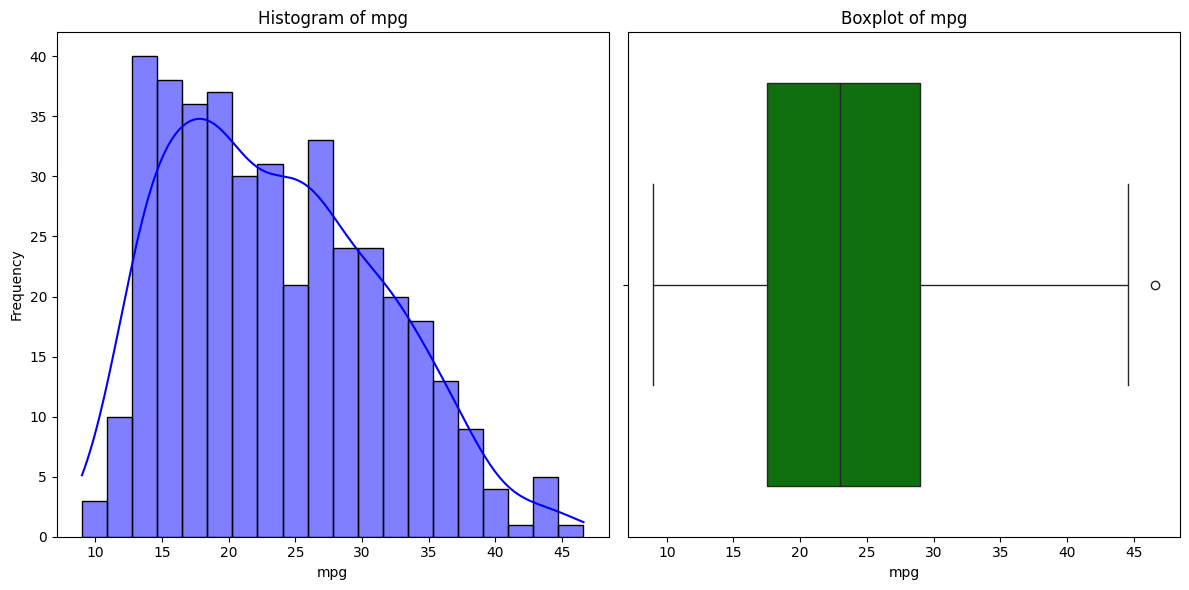

,mpg
num_missing,0.000000
missing_percentage,0.000000
min,9.000000
lower_quartile,17.500000
median,23.000000
mean,23.514573
upper_quartile,29.000000
max,46.600000


In [183]:
infor_mpg = calculate_value_distributed(df, 'mpg')
infor_mpg

Cột cylinders

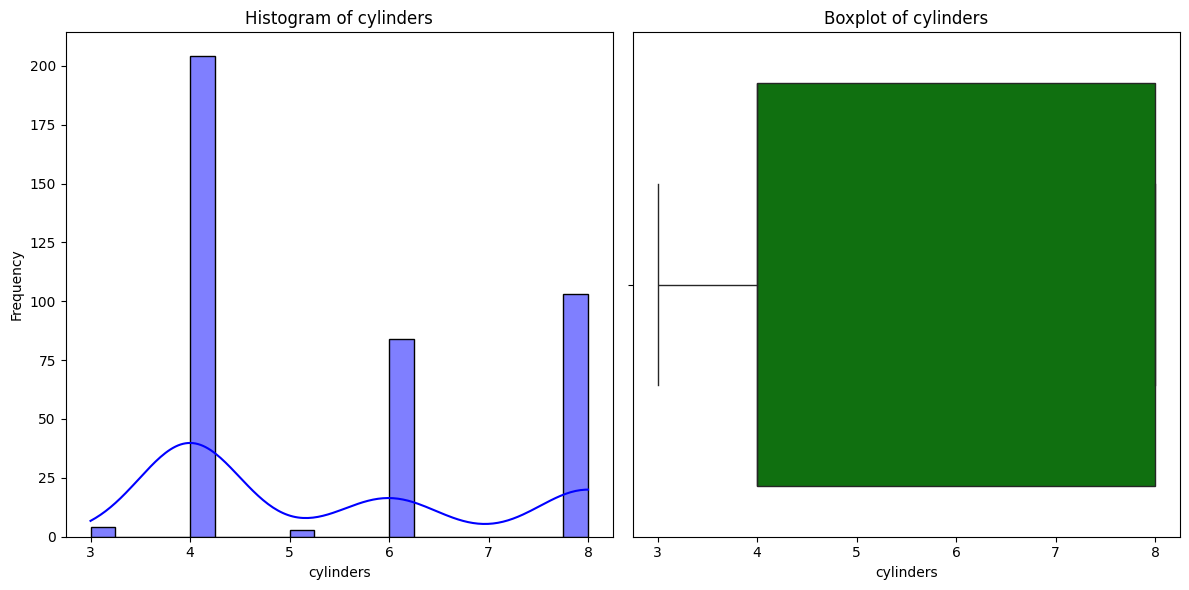

,cylinders
num_missing,0.000000
missing_percentage,0.000000
min,3.000000
lower_quartile,4.000000
median,4.000000
mean,5.454774
upper_quartile,8.000000
max,8.000000


In [184]:
infor_cyc = calculate_value_distributed(df, 'cylinders')
infor_cyc

Cột displacement

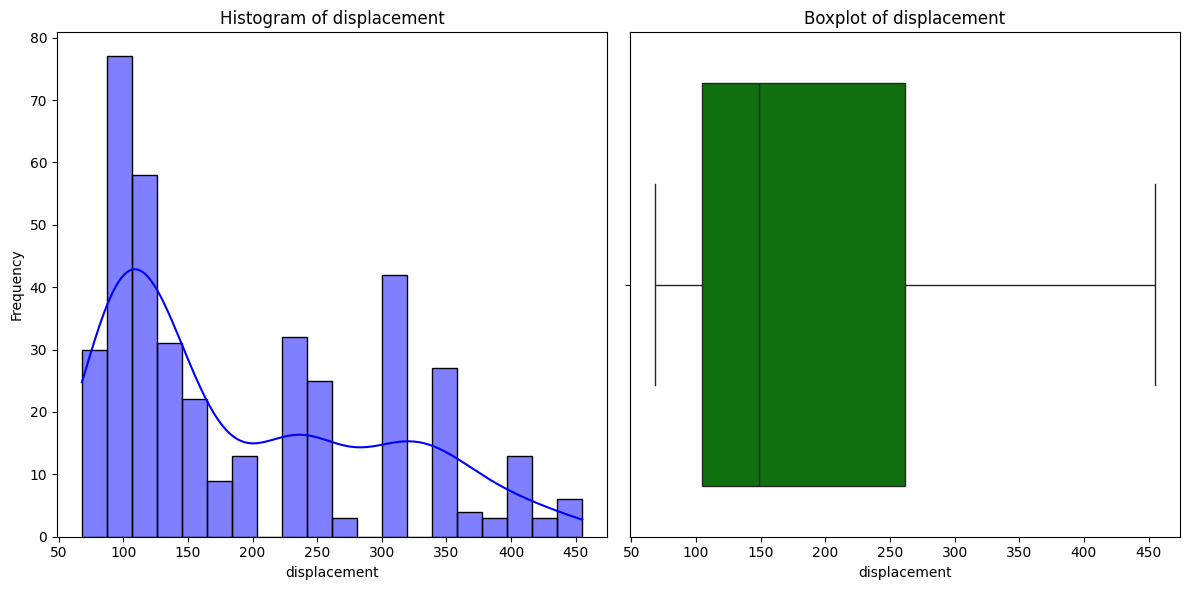

,displacement
num_missing,0.000000
missing_percentage,0.000000
min,68.000000
lower_quartile,104.250000
median,148.500000
mean,193.425879
upper_quartile,262.000000
max,455.000000


In [185]:
infor_dis = calculate_value_distributed(df, 'displacement')
infor_dis

Cột horsepower

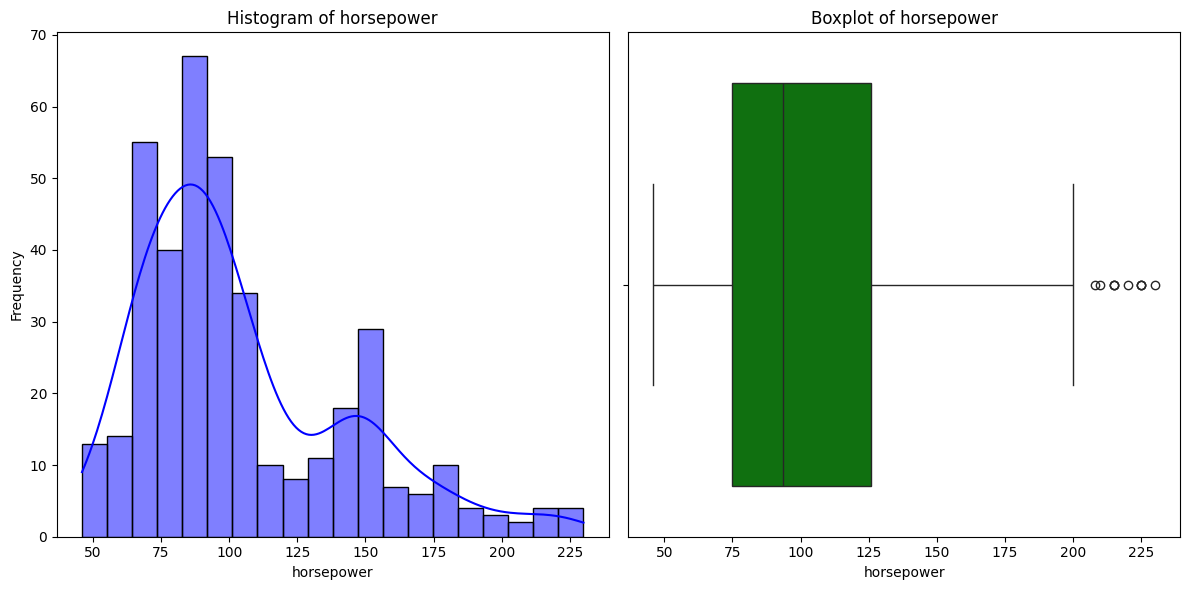

,horsepower
num_missing,6.000000
missing_percentage,1.507538
min,46.000000
lower_quartile,75.000000
median,93.500000
mean,104.469388
upper_quartile,126.000000
max,230.000000


In [186]:
infor_horsepower = calculate_value_distributed(df, 'horsepower')
infor_horsepower

Cột weight

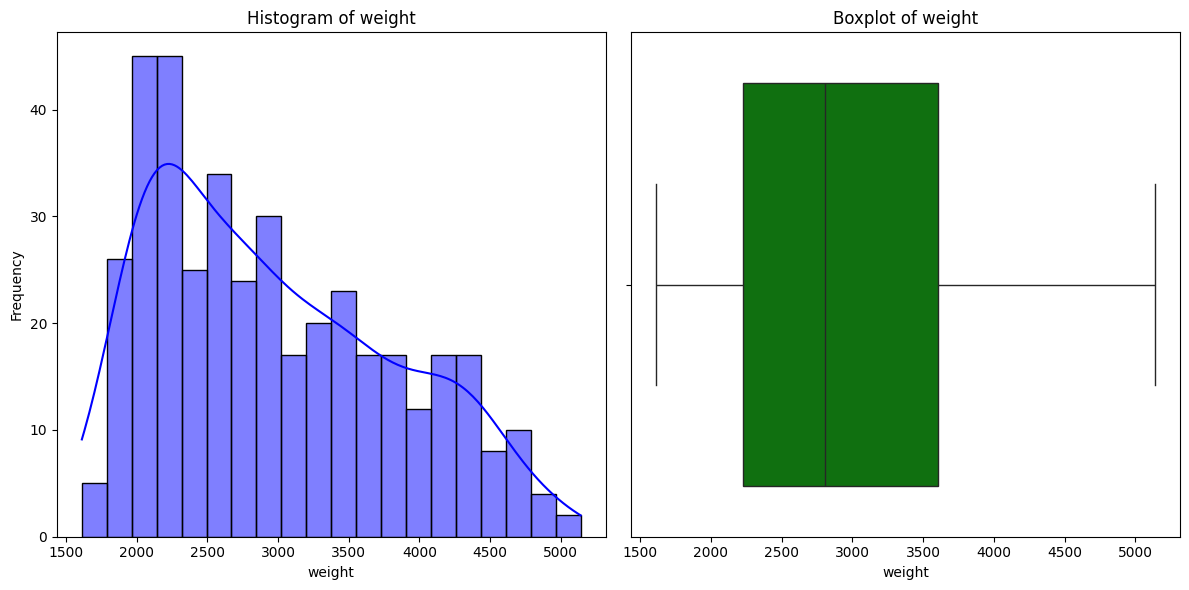

,weight
num_missing,0.000000
missing_percentage,0.000000
min,1613.000000
lower_quartile,2223.750000
median,2803.500000
mean,2970.424623
upper_quartile,3608.000000
max,5140.000000


In [187]:
infor_weight = calculate_value_distributed(df, 'weight')
infor_weight

Cột acceleration

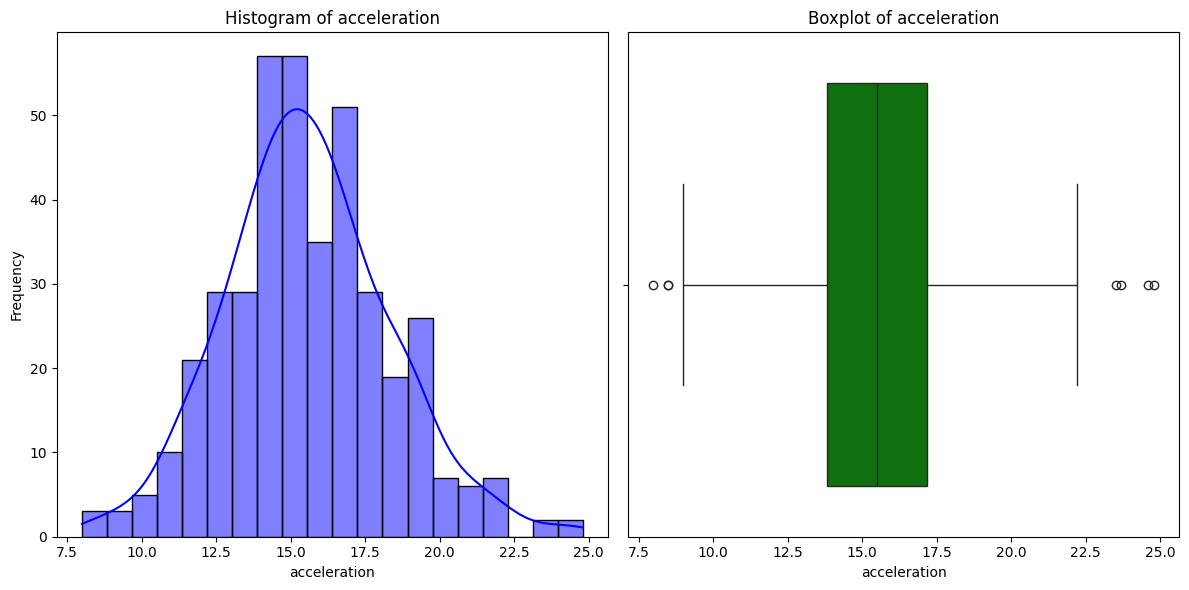

,acceleration
num_missing,0.00000
missing_percentage,0.00000
min,8.00000
lower_quartile,13.82500
median,15.50000
mean,15.56809
upper_quartile,17.17500
max,24.80000


In [188]:
infor_acceleration = calculate_value_distributed(df, 'acceleration')
infor_acceleration

Xử lý outlier

In [189]:

def handle_outliers(df, column_name):
    
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

    
    df_cleaned = df[~df[column_name].isin(outliers[column_name])]

    
    median_value = df[column_name].median()
    df[column_name] = np.where((df[column_name] < lower_bound) | (df[column_name] > upper_bound),
                               median_value, df[column_name])

    # Option 3: Cap the outliers (set them to the boundary values)
    df[column_name] = np.clip(df[column_name], lower_bound, upper_bound)

    return df_cleaned


df = handle_outliers(df, 'horsepower')
df = handle_outliers(df, 'acceleration')
df = handle_outliers(df, 'mpg')

print(df[['horsepower', 'acceleration', 'mpg']].describe())


       horsepower  acceleration         mpg
count  375.000000    381.000000  381.000000
mean   101.664000     15.636745   23.665617
std     33.653697      2.485508    7.532631
min     46.000000      9.500000    9.000000
25%     75.500000     14.000000   18.000000
50%     92.000000     15.500000   23.000000
75%    118.000000     17.100000   29.000000
max    200.000000     22.200000   44.600000


Here we can see that the "horsepower" column has missing values, so we will remove the rows containing NaN.

In [190]:
df = df.dropna()

The "acceleration" column in this dataset is measured in seconds, representing the time required to accelerate. The longer the acceleration time, the more stable the vehicle's speed tends to be. We need to be cautious to avoid any confusion.

## Asking meaningful question

| **Question**                                                | **Meaning of the Question**                                                |
|-------------------------------------------------------------|---------------------------------------------------------------------------|
| Which car is the most ideal?                                | Identify the relationships affecting the car's speed to choose the most ideal car. |
| Which origin is ideal for buying a car?                     | Identify the origin where car manufacturers have made the most improvements to buy durable and long-lasting cars. |
| How have production trends changed? Analyze these trends.    | Analyze the changes in car production trends over time.                   |



**Question 1: Which car is the most ideal?**  
Nowadays, young people are passionate about speed. Therefore, as part of the younger generation, we will focus on relationships surrounding speed to evaluate the vehicles. Here, we will examine which columns influence the speed column by using the correlation between them.

First, we will use the `corr` function to understand the relationships between them.

Hệ số tương quan:
                weight  acceleration       mpg  horsepower
weight        1.000000     -0.372970 -0.834458    0.880466
acceleration -0.372970      1.000000  0.360219   -0.647909
mpg          -0.834458      0.360219  1.000000   -0.790979
horsepower    0.880466     -0.647909 -0.790979    1.000000


<Axes: >

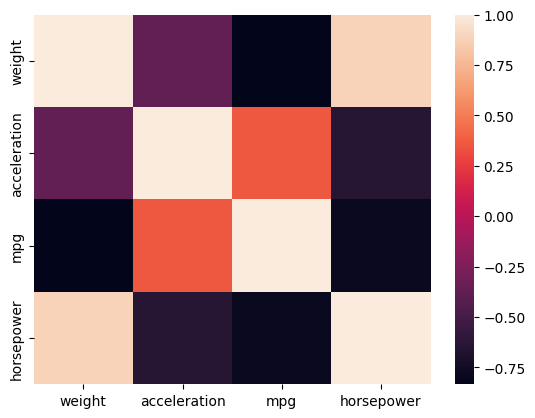

In [191]:
correlation_matrix = df[['weight', 'acceleration', 'mpg', 'horsepower']].corr()
print("Hệ số tương quan:")
print(correlation_matrix)

sns.heatmap(data=correlation_matrix)


After that, we will normalize the data to make it easier to calculate scores.

In [192]:
mpg = df['mpg']
mpg_norm = (mpg - mpg.min()) / (mpg.max() - mpg.min())

weight = df['weight']
weight_norm = (weight - weight.min()) / (weight.max() - weight.min())

acceleration = df['acceleration']
acceleration_norm = (acceleration - acceleration.min()) / (acceleration.max() - acceleration.min())

horsepower = df['horsepower']
horsepower_norm = (horsepower - horsepower.min()) / (horsepower.max() - horsepower.min())



Next, we will filter out the cars with the highest scores.

In [193]:
score = mpg_norm - weight_norm + acceleration_norm - horsepower_norm
df['score'] = score
score = score.sort_values(ascending=False)
df.loc[score.nlargest(10).index].reset_index(drop = True)

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,score
0,vw rabbit c (diesel),44.3,4,90.0,48.0,2085,21.7,1980,europe,1.805391
1,volkswagen rabbit custom diesel,43.1,4,90.0,48.0,1985,21.5,1978,europe,1.784288
2,chevrolet chevette,29.0,4,85.0,52.0,2035,22.2,1976,usa,1.403188
3,datsun 210,40.8,4,85.0,65.0,2110,19.2,1980,japan,1.392748
4,toyota corolla 1200,32.0,4,71.0,65.0,1836,21.0,1974,japan,1.364976
5,toyota corolla tercel,38.1,4,89.0,60.0,1968,18.8,1980,japan,1.358138
6,datsun 210 mpg,37.0,4,85.0,65.0,1975,19.4,1981,japan,1.340031
7,renault 5 gtl,36.0,4,79.0,58.0,1825,18.6,1977,europe,1.336933
8,toyota starlet,39.1,4,79.0,58.0,1755,16.9,1981,japan,1.310000
9,mazda glc deluxe,32.8,4,78.0,52.0,1985,19.4,1978,japan,1.303634


**Question 2: Which origin is ideal for buying a car ?**  
To choose such cars, you need to decide which manufacturer to buy from. Therefore, here we will identify the manufacturers that have made the most improvements to their vehicles.

In [194]:

# Lọc các cột cần thiết
data = df[['origin', 'model_year', 'mpg']]

# Tính trung bình mpg theo origin và model_year
mpg_by_origin_year = data.groupby(['origin', 'model_year'])['mpg'].mean().reset_index()

# Tìm năm đầu tiên và năm cuối cùng của mỗi origin
mpg_first_year = mpg_by_origin_year.groupby('origin').first().reset_index()
mpg_last_year = mpg_by_origin_year.groupby('origin').last().reset_index()

# Tính mức độ cải tiến mpg
mpg_improvement = mpg_last_year[['origin', 'mpg']].copy()
mpg_improvement['mpg_start'] = mpg_first_year['mpg']
mpg_improvement['mpg_change'] = mpg_improvement['mpg'] - mpg_improvement['mpg_start']

# Sắp xếp theo mức độ cải tiến
mpg_improvement = mpg_improvement.sort_values(by='mpg_change', ascending=False)

print("Mức độ cải tiến mpg của từng origin:")
print(mpg_improvement)

# Origin cải tiến nhiều nhất
most_improved_origin = mpg_improvement.iloc[0]
print("\nOrigin cải tiến nhiều nhất:")
print(f"Origin: {most_improved_origin['origin']}, Mức cải tiến: {most_improved_origin['mpg_change']:.2f} mpg")


Mức độ cải tiến mpg của từng origin:
   origin        mpg  mpg_start  mpg_change
2     usa  29.789474  16.428571   13.360902
0  europe  36.000000  25.200000   10.800000
1   japan  34.888889  25.500000    9.388889

Origin cải tiến nhiều nhất:
Origin: usa, Mức cải tiến: 13.36 mpg


**Question 3: How have production trends changed over time?**  
We will explore how production trends have shifted and analyze these trends in detail.

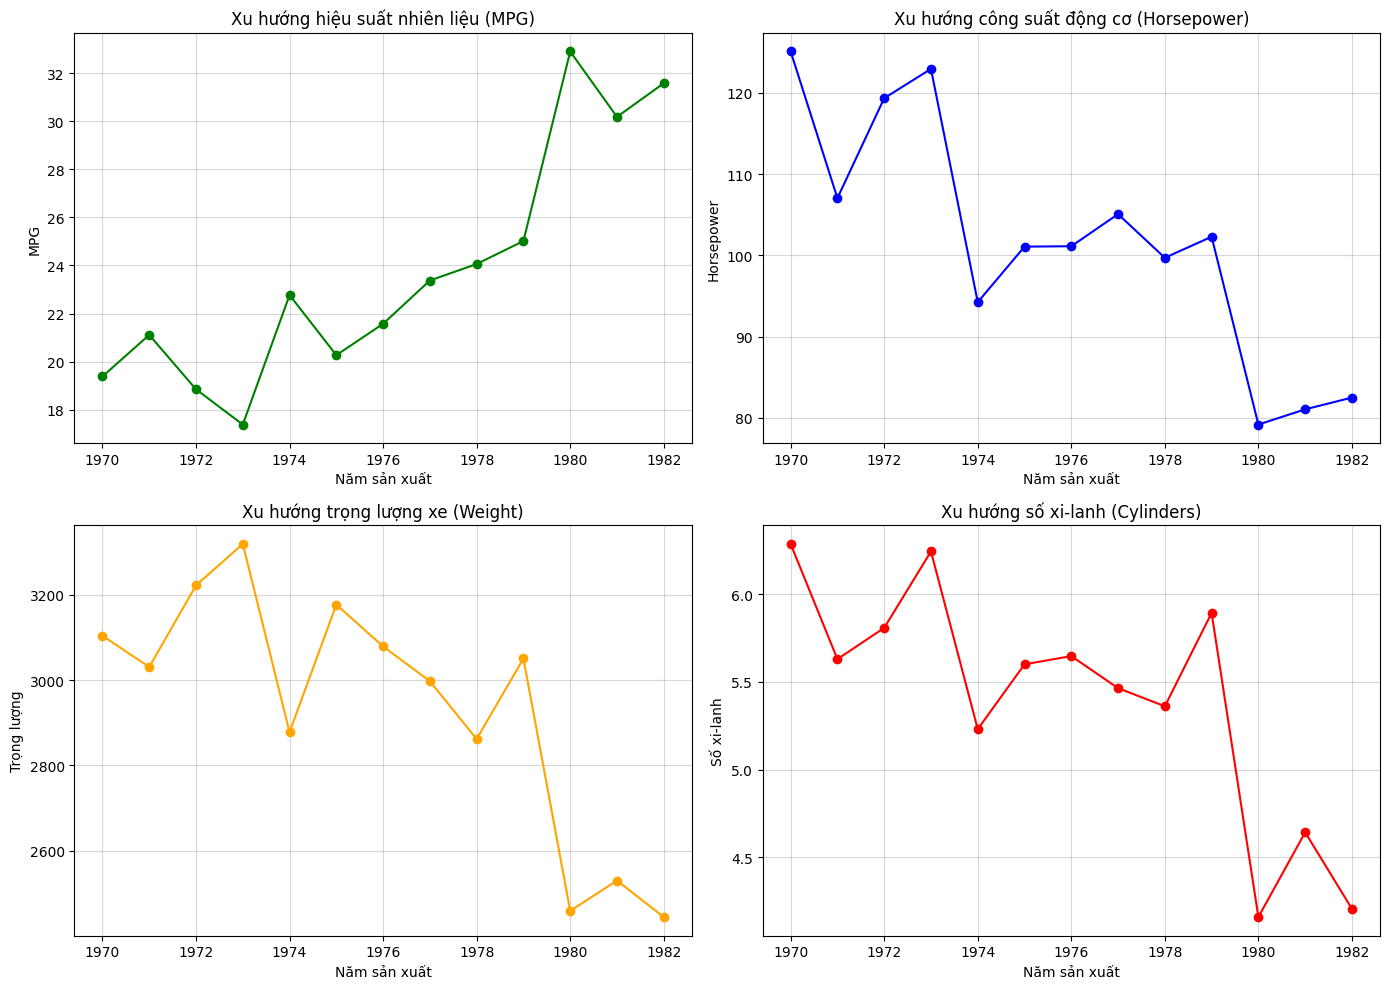

In [195]:



# Tính giá trị trung bình của các thuộc tính theo năm
trends = df.groupby('model_year')[['mpg', 'horsepower', 'weight', 'cylinders']].mean()

# Trực quan hóa xu hướng
plt.figure(figsize=(14, 10))

# Xu hướng hiệu suất nhiên liệu (MPG)
plt.subplot(2, 2, 1)
trends['mpg'].plot(marker='o', color='green')
plt.title('Xu hướng hiệu suất nhiên liệu (MPG)')
plt.xlabel('Năm sản xuất')
plt.ylabel('MPG')
plt.grid(alpha=0.5)

# Xu hướng công suất động cơ (Horsepower)
plt.subplot(2, 2, 2)
trends['horsepower'].plot(marker='o', color='blue')
plt.title('Xu hướng công suất động cơ (Horsepower)')
plt.xlabel('Năm sản xuất')
plt.ylabel('Horsepower')
plt.grid(alpha=0.5)

# Xu hướng trọng lượng xe (Weight)
plt.subplot(2, 2, 3)
trends['weight'].plot(marker='o', color='orange')
plt.title('Xu hướng trọng lượng xe (Weight)')
plt.xlabel('Năm sản xuất')
plt.ylabel('Trọng lượng')
plt.grid(alpha=0.5)

# Xu hướng số xi-lanh (Cylinders)
plt.subplot(2, 2, 4)
trends['cylinders'].plot(marker='o', color='red')
plt.title('Xu hướng số xi-lanh (Cylinders)')
plt.xlabel('Năm sản xuất')
plt.ylabel('Số xi-lanh')
plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()


From the charts above, we can see that fuel efficiency has become increasingly important over time. Therefore, we will analyze this attribute in detail.

We will investigate how other attributes influence this attribute.

In [196]:
maxtrix_corr = df[['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year']].corr()
maxtrix_corr['mpg']

mpg             1.000000
cylinders      -0.771885
displacement   -0.806680
horsepower     -0.790979
weight         -0.834458
acceleration    0.360219
model_year      0.549989
Name: mpg, dtype: float64

Next, we will visualize the data to clearly see the relationships between these attributes.

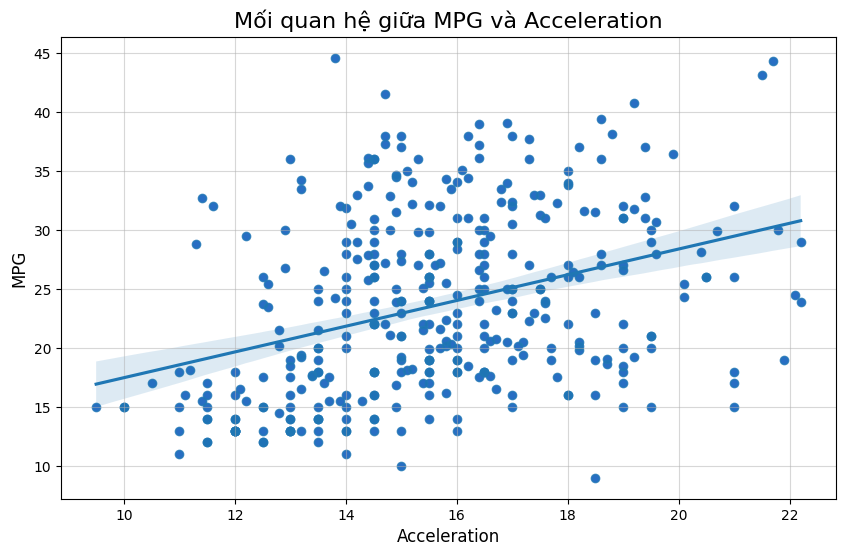

MPG trung bình theo các nhóm tăng tốc:
acceleration_bins
(9.487, 12.04]    16.196774
(12.04, 14.58]    21.402778
(14.58, 17.12]    25.183333
(17.12, 19.66]    25.900000
(19.66, 22.2]     27.257895
Name: mpg, dtype: float64


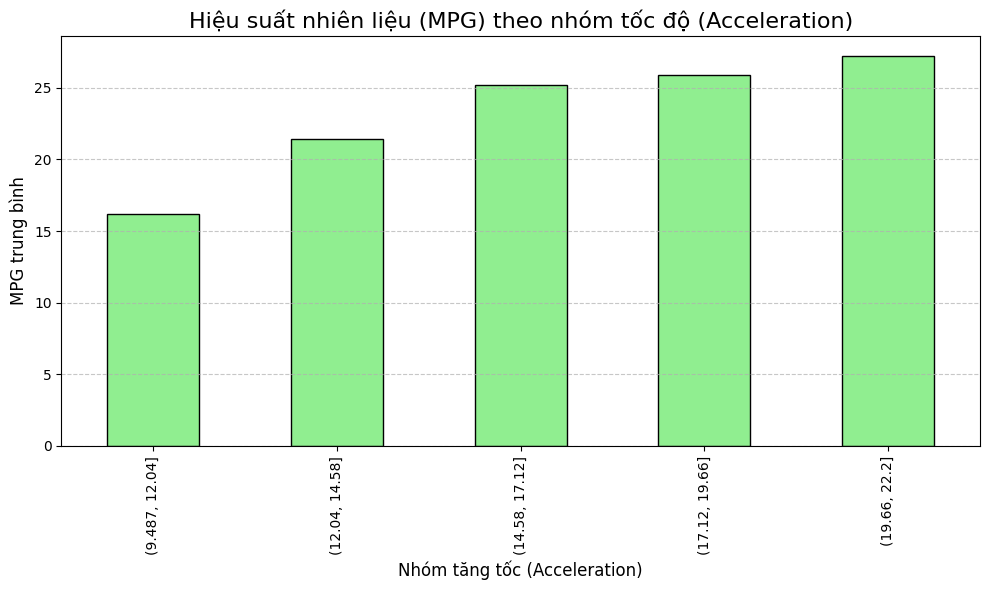

In [197]:
# 2. Trực quan hóa mối quan hệ
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='acceleration', y='mpg', color='blue', alpha=0.7)
sns.regplot(data=df, x='acceleration', y='mpg')
plt.title('Mối quan hệ giữa MPG và Acceleration', fontsize=16)
plt.xlabel('Acceleration', fontsize=12)
plt.ylabel('MPG', fontsize=12)
plt.grid(alpha=0.5)
plt.show()

# 3. Phân tích nhóm acceleration và mpg
# Chia acceleration thành các nhóm (bins)
df['acceleration_bins'] = pd.cut(df['acceleration'], bins=5)

# Tính trung bình MPG trong từng nhóm
mpg_by_accel = df.groupby('acceleration_bins', observed=True)['mpg'].mean()
print("MPG trung bình theo các nhóm tăng tốc:")
print(mpg_by_accel)

# 4. Vẽ biểu đồ MPG theo nhóm acceleration
mpg_by_accel.plot(kind='bar', color='lightgreen', edgecolor='black', figsize=(10, 6))
plt.title('Hiệu suất nhiên liệu (MPG) theo nhóm tốc độ (Acceleration)', fontsize=16)
plt.xlabel('Nhóm tăng tốc (Acceleration)', fontsize=12)
plt.ylabel('MPG trung bình', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

From this, we can observe that the more stable the driving, the higher the fuel efficiency. The greater the fluctuation in speed, the higher the fuel consumption.